# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#response = requests.get(query_url + "Chicago").json()

#print(json.dumps(response, indent=4, sort_keys=True))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#storing all values needed for weather


city_2 = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
counter = 0

#looping through city names from above list
for city in cities:
    
        # Create search query, make request and store in json
    query = query_url + city
    response = requests.get(query)
    response_json = response.json()
    
    
    #try to grab all variables above
    try:
        
        city_2.append(response_json["name"])
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        wind_speed.append(response_json["wind"]["speed"])
        counter+=1
        
        print(f"{counter}. Grabbing weather data for {city}")
        
    #handling if a city is not there
    
    except:
        # Append null values
        print("City not found")
        pass
        # Add a one second interval between queries to stay within API query limits
    time.sleep(1)

1. Grabbing weather data for kavaratti
2. Grabbing weather data for albany
3. Grabbing weather data for zhigansk
4. Grabbing weather data for lagoa
5. Grabbing weather data for rikitea
6. Grabbing weather data for touros
7. Grabbing weather data for kapaa
8. Grabbing weather data for severo-kurilsk
9. Grabbing weather data for geraldton
10. Grabbing weather data for riyadh
11. Grabbing weather data for ushuaia
12. Grabbing weather data for bhag
13. Grabbing weather data for jamestown
14. Grabbing weather data for lincoln
15. Grabbing weather data for bom jesus
16. Grabbing weather data for carnarvon
17. Grabbing weather data for dauphin
18. Grabbing weather data for aykhal
19. Grabbing weather data for bredasdorp
20. Grabbing weather data for pangnirtung
21. Grabbing weather data for qaanaaq
22. Grabbing weather data for punta arenas
23. Grabbing weather data for tatishchevo
24. Grabbing weather data for hamilton
25. Grabbing weather data for kruisfontein
26. Grabbing weather data for 

197. Grabbing weather data for puri
198. Grabbing weather data for sitka
199. Grabbing weather data for yumen
City not found
200. Grabbing weather data for sao miguel do araguaia
201. Grabbing weather data for sinazongwe
202. Grabbing weather data for ust-tsilma
203. Grabbing weather data for iqaluit
204. Grabbing weather data for broome
City not found
City not found
205. Grabbing weather data for beroroha
206. Grabbing weather data for sosnovo-ozerskoye
207. Grabbing weather data for bathsheba
City not found
City not found
208. Grabbing weather data for manavalakurichi
209. Grabbing weather data for lorengau
City not found
210. Grabbing weather data for padang
211. Grabbing weather data for skoghall
212. Grabbing weather data for dourbali
213. Grabbing weather data for mahanoro
214. Grabbing weather data for bandarbeyla
215. Grabbing weather data for waipawa
216. Grabbing weather data for pogradec
217. Grabbing weather data for santa isabel do rio negro
218. Grabbing weather data for 

390. Grabbing weather data for laureles
391. Grabbing weather data for onega
392. Grabbing weather data for lawrenceburg
393. Grabbing weather data for amga
394. Grabbing weather data for serenje
395. Grabbing weather data for gonda
396. Grabbing weather data for teknaf
397. Grabbing weather data for ha tinh
City not found
398. Grabbing weather data for yeppoon
City not found
399. Grabbing weather data for jhalu
400. Grabbing weather data for bandar-e lengeh
401. Grabbing weather data for half moon bay
402. Grabbing weather data for deoli
403. Grabbing weather data for sarahan
404. Grabbing weather data for port moresby
405. Grabbing weather data for ostrovnoy
406. Grabbing weather data for coihaique
407. Grabbing weather data for caohai
408. Grabbing weather data for samarai
409. Grabbing weather data for baykit
410. Grabbing weather data for datong
411. Grabbing weather data for saint-francois
City not found
412. Grabbing weather data for maine-soroa
413. Grabbing weather data for ma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame({
    "City": city_2,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kavaratti,100,IN,1569500319,78,10.57,72.64,27.27,7.35
1,Albany,75,US,1569500258,67,42.65,-73.75,18.33,4.60
2,Zhigansk,100,RU,1569500321,74,66.77,123.37,4.37,5.27
3,Lagoa,0,PT,1569500323,56,37.14,-8.45,26.67,3.10
4,Rikitea,11,PF,1569500324,73,-23.12,-134.97,21.67,4.03


In [24]:
weather_df.to_csv("weather_data.csv")

In [26]:
#pulling CSV into dataframe
weather_data = pd.read_csv("weather_data.csv")
#creating weather dataframe to avoid calling the api everytime
weather_data = weather_data.drop("Unnamed: 0" , axis = 1)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kavaratti,100,IN,1569500319,78,10.57,72.64,27.27,7.35
1,Albany,75,US,1569500258,67,42.65,-73.75,18.33,4.60
2,Zhigansk,100,RU,1569500321,74,66.77,123.37,4.37,5.27
3,Lagoa,0,PT,1569500323,56,37.14,-8.45,26.67,3.10
4,Rikitea,11,PF,1569500324,73,-23.12,-134.97,21.67,4.03


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

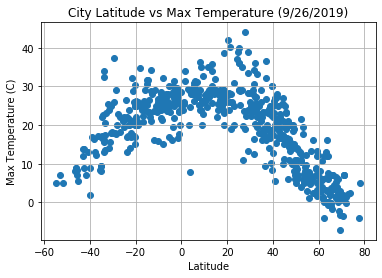

In [31]:
#scatterplot Latitude vs. Temperature Plot
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]
plt.scatter(x_values,y_values,)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs Max Temperature (9/26/2019)")
plt.grid()
plt.savefig("Latitude_vs_Temperature.png")
plt.show()


#### Latitude vs. Humidity Plot

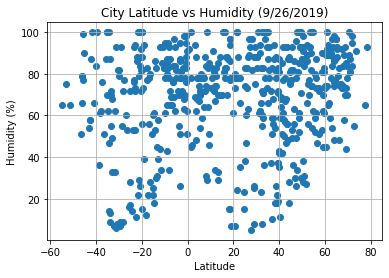

In [33]:
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]
plt.scatter(x_values,y_values,)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs Humidity (9/26/2019)")
plt.grid()
plt.savefig("City_Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

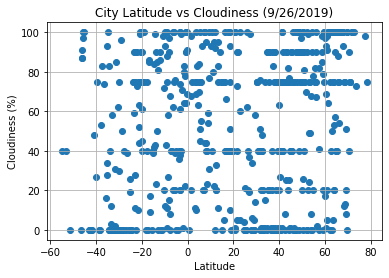

In [34]:
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]
plt.scatter(x_values,y_values,)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness (9/26/2019)")
plt.grid()
plt.savefig("City_Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

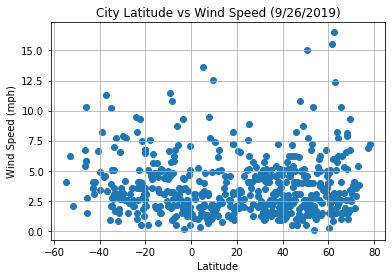

In [35]:
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]
plt.scatter(x_values,y_values,)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed (9/26/2019)")
plt.grid()
plt.savefig("City_Lat_vs_Wind Speed.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


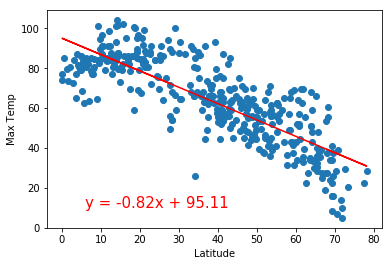

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


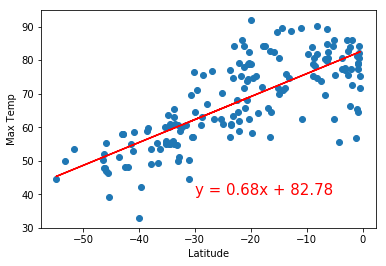

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


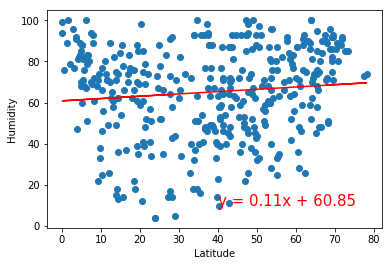

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


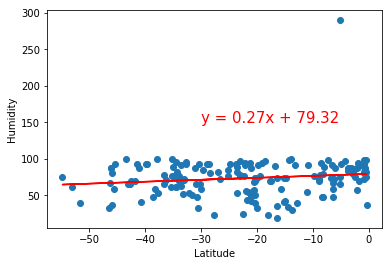

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


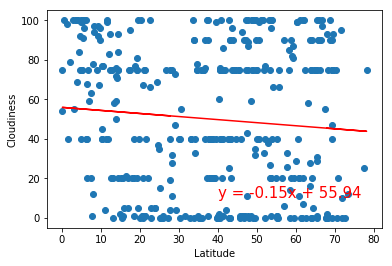

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


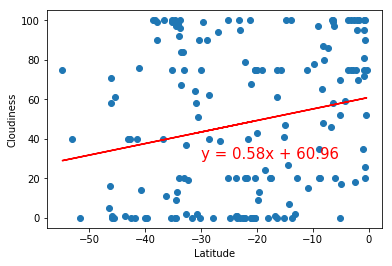

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


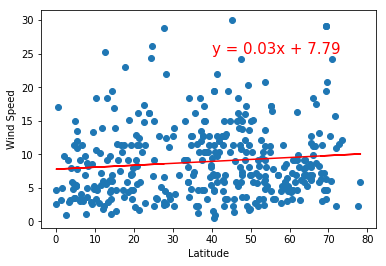

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


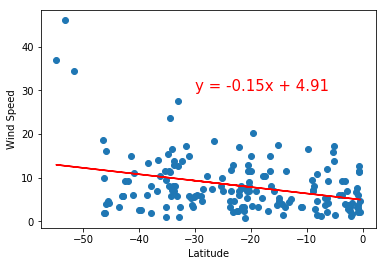